# Установка библиотек
Для нашей задачи мы выбрали библиотеку detecton2. У нее не очень простая установка, поэтому покажем как ее установить на комьютере с ОС Windows 10.

Мы руководствовались [этим документом](https://medium.com/@dgmaxime/how-to-easily-install-detectron2-on-windows-10-39186139101c)

Если устанавливаем на комьютере с видеокартой nvidia то сначала нужно установить инструмент cuda, чтобы использовать видеокарту в вычислениях.  
Мы рассмотрим установку версии с расчетами на процессоре (cpuonly). 

## Pytorch

detectorn2 работает на основе pytorch. Поэтому сначала нужно поставить его.  
На сайте [pytorch](https://pytorch.org/get-started/locally/) выбираем свои параметры и получаем командную строку как установить pytorch и связанные программы.  

Для моей системы получил такую строку:   
`conda install pytorch torchvision torchaudio cpuonly -c pytorch`

In [1]:
!conda install pytorch torchvision torchaudio cpuonly -c pytorch -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Soft\Anaconda

  added / updated specs:
    - cpuonly
    - pytorch
    - torchaudio
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    cpuonly-1.0                |                0           2 KB  pytorch
    libuv-1.40.0               |       h8ffe710_0         330 KB  conda-forge
    ninja-1.10.2               |       h5362a0b_0         273 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    pytorch-1.7.1              |      py3.8_cpu_0       156.8 MB  pytorch
    torchaudio-0.7.2           |             py38         2.7 MB  pytorch
    torchvision-0.8.2          |         py38_cpu         6.6 MB  pytorch
    ---------------------------------------------------

## detectron2

Для windows нет официального дистрибутива `detectron2`, поэтому воспользуемся [этим репозиторием](https://github.com/DGMaxime/detectron2-windows)    
Установим библиотеку из git

In [2]:
!git clone https://github.com/DGMaxime/detectron2-windows.git
!pip install -e detectron2-windows

Cloning into 'detectron2-windows'...


Obtaining file:///D:/EDU/projects/startup_depo/3.%20Deep%20learning/detectron2-windows
Processing c:\users\roman\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached tabulate-0.8.7-py3-none-any.whl (24 kB)
  Using cached tensorboard-2.4.0-py3-none-any.whl (10.6 MB)
Processing c:\users\roman\appdata\local\pip\cache\wheels\63\f6\3b\11af18cd945083c903eb02ca419fa93fdd3c21a2b78538c22b\fvcore-0.1.2.post20201218-py3-none-any.whl
  Using cached pydot-1.4.1-py2.py3-none-any.whl (19 kB)
  Using cached tensorboard_plugin_wit-1.7.0-py3-none-any.whl (779 kB)
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached grpcio-1.34.0-cp38-cp38-win_amd64.whl (2.9 MB)
  Using cached protobuf-3.14.0-py2.py3-none-any.whl (173 kB)
  Using cached google_auth-1.24.0-py2.py3-none-any.whl (114 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Using cache

## Проверяем работу

In [1]:
import numpy as np
import cv2
import requests
import matplotlib.pyplot as plt

from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2 import model_zoo

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
# Load an image
res = requests.get("https://live.staticflickr.com/700/33224654191_fdaee2e3f1_c_d.jpg")
image = np.asarray(bytearray(res.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)


На виндовс какая-то проблема с получением моделей из интернета по ссылке "detectron2://...", поэтому я их скачивал самостоятельно и указывал ссылку на файл.  
Скачать веса моделей можно [отсюда](https://github.com/DGMaxime/detectron2-windows/blob/master/MODEL_ZOO.md)

In [3]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file('COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml'))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75 # Threshold
#cfg.MODEL.WEIGHTS = "detectron2://COCO-Detection/faster_rcnn_R_101_FPN_3x/137851257/model_final_f6e8b1.pkl"
cfg.MODEL.WEIGHTS = r"D:\MEDIA\Downloads\model_final_f6e8b1.pkl"
cfg.MODEL.DEVICE = "cpu" # cpu or cuda

In [4]:
predictor = DefaultPredictor(cfg)

In [5]:
#Make prediction
output = predictor(image)
print(output)
v = Visualizer(image[:, :, ::-1],
               scale=0.8,
               metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
               instance_mode=ColorMode.IMAGE
               )
v = v.draw_instance_predictions(output["instances"].to("cpu"));


d:\edu\projects\startup_depo\3. deep learning\detectron2-windows\detectron2\layers\wrappers.py:226: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  ..\torch\csrc\utils\python_arg_parser.cpp:882.)
  return x.nonzero().unbind(1)


{'instances': Instances(num_instances=10, image_height=696, image_width=800, fields=[pred_boxes: Boxes(tensor([[381.5301,  37.9873, 660.5099, 633.0025],
        [609.0862,  52.3061, 778.6715, 608.7546],
        [ 76.1546, 342.9806, 350.8254, 637.9863],
        [116.5006,  50.8391, 225.4073, 244.8143],
        [212.0942,  12.9442, 342.5333, 248.1474],
        [339.8039,  41.2512, 438.5270, 242.1404],
        [682.8400,   1.2311, 785.6708, 182.6450],
        [ 70.0013,  67.1564, 141.3879, 201.0686],
        [  1.1377,  59.1209,  48.8566, 245.9817],
        [479.2893, 135.2387, 502.9640, 239.9862]])), scores: tensor([0.9983, 0.9974, 0.9959, 0.9919, 0.9891, 0.9586, 0.9503, 0.9474, 0.8453,
        0.8035]), pred_classes: tensor([ 0,  0, 16,  0,  0,  0,  0,  0,  0, 27])])}


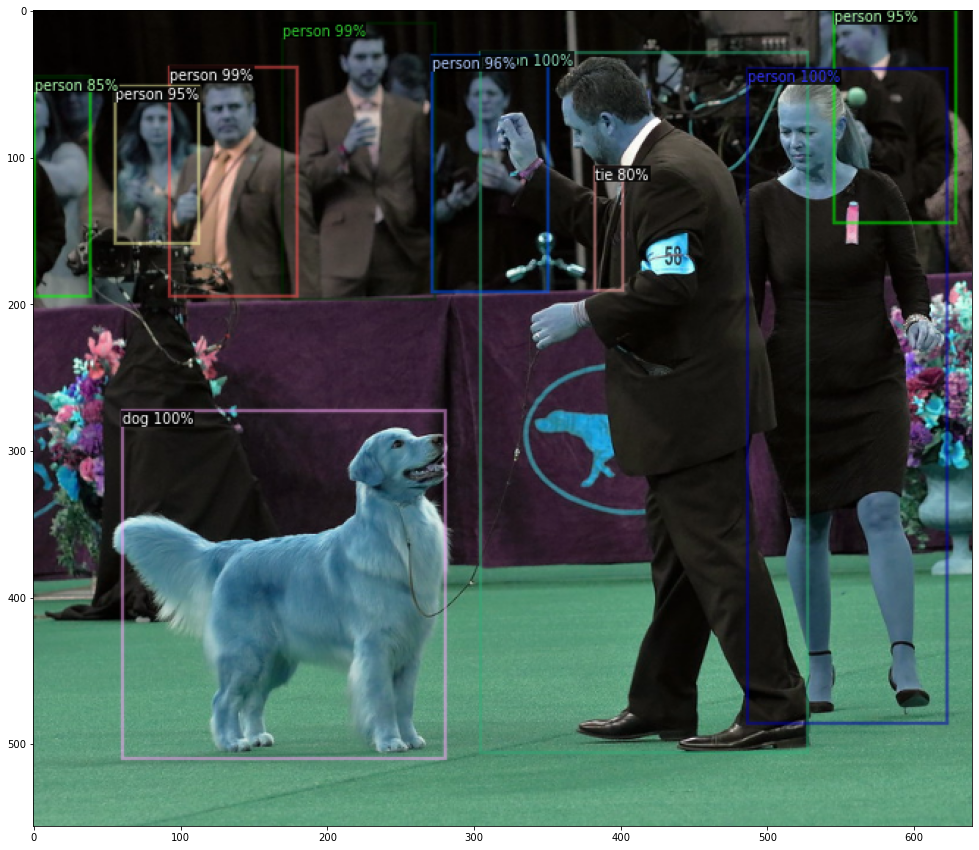

In [6]:
plt.rcParams["figure.figsize"] = [25,15] # Увеличим габариты вывода рисунков
plt.imshow(v.get_image()[:, :, ::-1]);
